In [166]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from datetime import datetime
import seaborn as sns
import ipywidgets as widgets

sns.set()
%matplotlib inline

In [118]:
filenames = [x for x in os.listdir("Data/Stocks/") if x.endswith('.txt') 
                           and os.path.getsize("Data/Stocks/"+x) > 0]

In [119]:
print("number of stocks with data: " + str(len(filenames)))

number of stocks with data: 7163


In [65]:
StartDate = []
EndDate = []
for f in filenames:
    Temp = pd.read_csv("Data/Stocks/"+ f)
    StartDate.append(datetime.strptime(Temp.iloc[0,0],"%Y-%m-%d"))
    EndDate.append(datetime.strptime(Temp.iloc[-1,0],"%Y-%m-%d"))

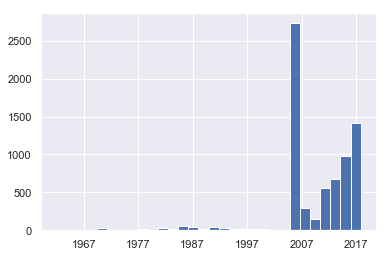

In [80]:
pd.Series(StartDate).hist(bins=30)

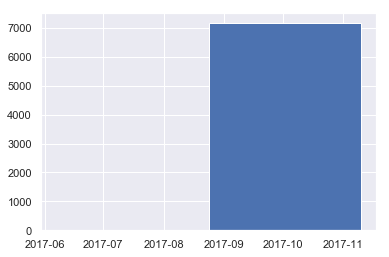

In [81]:
pd.Series(EndDate).hist(bins=2)

In [116]:
def PlotWindow(t,timeSeries,WindowWidth):
    plt.plot(timeSeries[t:t+WindowWidth])
    

In [232]:
widgets.interact(PlotWindow,t=widgets.IntSlider(min=0,max=3200,step=1,value=0),
                 WindowWidth = widgets.IntSlider(min=0,max=3200,step=1,value=100),
                 timeSeries=widgets.fixed(P2r['High']))

interactive(children=(IntSlider(value=0, description='t', max=3200, step=22), IntSlider(value=100, description…

<function __main__.PlotWindow(t, timeSeries, WindowWidth)>

In [326]:
P1 = pd.read_csv("Data/Stocks/"+ filenames[0])
P2 = pd.read_csv("Data/Stocks/"+ filenames[526])

P1["Date"]=P1["Date"].apply(lambda d: datetime.strptime(d,"%Y-%m-%d"))
P2["Date"]=P2["Date"].apply(lambda d: datetime.strptime(d,"%Y-%m-%d"))

P2r = P2[P2["Date"].isin(P1["Date"])]
P1r = P1[P1["Date"].isin(P2["Date"])]

R1 = (np.array(P1r["High"].iloc[1:]) - np.array(P1r["High"].iloc[:-1]))/np.array(P1r["High"].iloc[:-1])

R2 = (np.array(P2r["High"].iloc[1:]) - np.array(P2r["High"].iloc[:-1]))/np.array(P2r["High"].iloc[:-1])

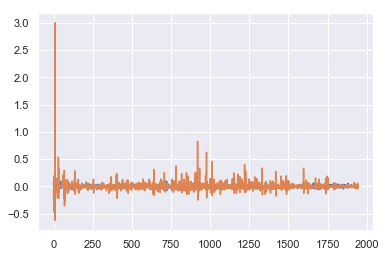

In [327]:
plt.plot(R1)
plt.plot(R2)

In [221]:
def PlotWindow1(t,t1s,t2s,WindowWidth):
    plt.plot(t1s[t:t+WindowWidth])
    plt.plot(t2s[t:t+WindowWidth])

In [328]:
widgets.interact(PlotWindow1,t=widgets.IntSlider(min=0,max=3200,step=1,value=0),
                 WindowWidth = widgets.IntSlider(min=0,max=3200,step=1,value=100),
                 t1s = widgets.fixed(R1), t2s = widgets.fixed(R2))

interactive(children=(IntSlider(value=0, description='t', max=3200), IntSlider(value=100, description='WindowW…

<function __main__.PlotWindow1(t, t1s, t2s, WindowWidth)>

In [329]:
widgets.interact(PlotWindow1,t=widgets.IntSlider(min=0,max=3200,step=1,value=0),
                 WindowWidth = widgets.IntSlider(min=0,max=3200,step=1,value=100),
                 t1s = widgets.fixed(P1r["High"]), t2s = widgets.fixed(P2r["High"]))

interactive(children=(IntSlider(value=0, description='t', max=3200), IntSlider(value=100, description='WindowW…

<function __main__.PlotWindow1(t, t1s, t2s, WindowWidth)>

In [243]:
Corrt = []
for t in range(len(R1)):
    Corrt.append(pd.Series(P1).corr(pd.Series(R2),=t))

TypeError: corr() got an unexpected keyword argument 'lag'

In [325]:
widgets.interact(PlotWindow,t=widgets.IntSlider(min=0,max=3200,step=1,value=520),
                 WindowWidth = widgets.IntSlider(min=0,max=3200,step=1,value=3200),
                 timeSeries=widgets.fixed(D))

interactive(children=(IntSlider(value=520, description='t', max=3200), IntSlider(value=3200, description='Wind…

<function __main__.PlotWindow(t, timeSeries, WindowWidth)>

In [276]:
np.argmax(np.correlate(R1[1000:1005],R2,"same"))

774

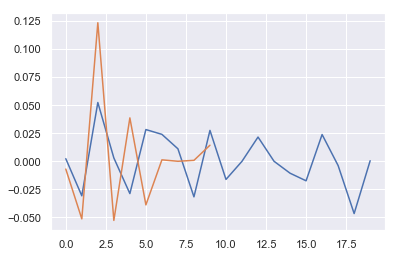

In [277]:
plt.plot(R2[770:790])
plt.plot(R1[1000:1010])

In [291]:
D = []
P1 = pd.read_csv("Data/Stocks/"+ filenames[0])
P1["Date"]=P1["Date"].apply(lambda d: datetime.strptime(d,"%Y-%m-%d"))
N =len(P1)

for f in filenames:
    print(f)
    P2 = pd.read_csv("Data/Stocks/"+ f)

    P2["Date"]=P2["Date"].apply(lambda d: datetime.strptime(d,"%Y-%m-%d"))

    P2r = P2[P2["Date"].isin(P1["Date"])]
    P1r = P1[P1["Date"].isin(P2["Date"])]

    R1 = (np.array(P1r["High"].iloc[1:]) - np.array(P1r["High"].iloc[:-1]))/np.array(P1r["High"].iloc[:-1])
    R2 = (np.array(P2r["High"].iloc[1:]) - np.array(P2r["High"].iloc[:-1]))/np.array(P2r["High"].iloc[:-1])
    D.append(pd.Series(R1).corr(pd.Series(R2))*(len(R1)/N))

iba.us.txt
wpz.us.txt
opnt.us.txt
indf.us.txt
flic.us.txt
nbhc.us.txt
ncs.us.txt
grvy.us.txt
lgcyo.us.txt
eqco.us.txt
gpk.us.txt
wti.us.txt
dyn_a.us.txt
cstr.us.txt
mygn.us.txt
cor_a-cl.us.txt
jmu.us.txt
jpem.us.txt
kelya.us.txt
wbig.us.txt
eemx.us.txt
nycb.us.txt
elp.us.txt
aieq.us.txt
axas.us.txt
cphi.us.txt
thr.us.txt
nxeow.us.txt
vrsk.us.txt
abil.us.txt
evep.us.txt
srlp.us.txt
www.us.txt
nnvc.us.txt
exr.us.txt
feye.us.txt
rbcaa.us.txt
enrj.us.txt
mlnt.us.txt
avt.us.txt
gazb.us.txt
dxr.us.txt
gdi.us.txt
ngvt.us.txt
irix.us.txt
pay.us.txt
pfbx.us.txt
hyxu.us.txt
nlnk.us.txt
ivc.us.txt
mxe.us.txt
osb.us.txt
txrh.us.txt
mx.us.txt
smmd.us.txt
mnro.us.txt
hdez.us.txt
pgz.us.txt
l.us.txt
jasn.us.txt
gfy.us.txt
eim.us.txt
bll.us.txt
pci.us.txt
born.us.txt
ribtw.us.txt
cizn.us.txt
usau.us.txt
brkr.us.txt
tmo.us.txt
nee_j.us.txt
clns_b.us.txt
cmct.us.txt
mmi.us.txt
stor.us.txt
clct.us.txt
fuv.us.txt
pdlb.us.txt
oilb.us.txt
tgen.us.txt
fat.us.txt
cma-ws.us.txt
he.us.txt
wyde.us.txt
cor.us.txt

dpst.us.txt
bmra.us.txt
trco.us.txt
aeri.us.txt
wstl.us.txt
clrbw.us.txt
gib.us.txt
mfa.us.txt
hlt.us.txt
stz.us.txt
omf.us.txt
ovas.us.txt
spi.us.txt
laws.us.txt
agm_b.us.txt
ihg.us.txt
onvi.us.txt
ttac.us.txt
brcd.us.txt
whlrw.us.txt
chmi_a.us.txt
sdpi.us.txt
qlys.us.txt
pbfx.us.txt
cm.us.txt
mrc.us.txt
pcbk.us.txt
albo.us.txt
tear.us.txt
pol.us.txt
mbvx.us.txt
pb.us.txt
ssw.us.txt
jphf.us.txt
csf.us.txt
nano.us.txt
uvv.us.txt
sbfg.us.txt
caro.us.txt
spib.us.txt
cnacr.us.txt
evg.us.txt
bsf.us.txt
clir.us.txt
hii.us.txt
ocsll.us.txt
ttf.us.txt
jbn.us.txt
drna.us.txt
divo.us.txt
stag.us.txt
utf.us.txt
epd.us.txt
boot.us.txt
iii.us.txt
cmre_c.us.txt
arex.us.txt
gpre.us.txt
etw.us.txt
esgs.us.txt
dgx.us.txt
tcfc.us.txt
tgi.us.txt
sbh.us.txt
ohai.us.txt
scwx.us.txt
akam.us.txt
bby.us.txt
ghl.us.txt
syke.us.txt
ugi.us.txt
flqd.us.txt
jpih.us.txt
oke.us.txt
rose.us.txt
sohoo.us.txt
crh.us.txt
ahl_c.us.txt
jec.us.txt
twx.us.txt
hlne.us.txt
nke.us.txt
kap.us.txt
pxlw.us.txt
tess.us.txt
flau.u

hscz.us.txt
nmih.us.txt
inst.us.txt
csgs.us.txt
pbi.us.txt
trmt.us.txt
spwh.us.txt
snes.us.txt
stag_b.us.txt
ceva.us.txt
heb.us.txt
stml.us.txt
odp.us.txt
ari.us.txt
low.us.txt
sypr.us.txt
ndp.us.txt
bntc.us.txt
dks.us.txt
too_a.us.txt
pbhc.us.txt
snc.us.txt
ped.us.txt
fisi.us.txt
cmre.us.txt
mson.us.txt
nsl.us.txt
allt.us.txt
acv.us.txt
clb.us.txt
vesh.us.txt
isp-cl.us.txt
ello.us.txt
b.us.txt
fcnca.us.txt
nuo.us.txt
pcg.us.txt
rrts.us.txt
cor_a.us.txt
emp.us.txt
llex.us.txt
saex.us.txt
entg.us.txt
avav.us.txt
hca.us.txt
usrt.us.txt
pfsi.us.txt
wtid.us.txt
igr.us.txt
evgn.us.txt
voxx.us.txt
kamn.us.txt
dnn.us.txt
mye.us.txt
hk.us.txt
nxeo.us.txt
wex.us.txt
mtor.us.txt
fbnk.us.txt
dxlg.us.txt
maa_i.us.txt
asg.us.txt
crvl.us.txt
kref.us.txt
loma.us.txt
lvnta.us.txt
htf-cl.us.txt
wrd.us.txt
induu.us.txt
ccrn.us.txt
hewu.us.txt
inbk.us.txt
basi.us.txt
gut.us.txt
colb.us.txt
deef.us.txt
holx.us.txt
mnga.us.txt
hcm.us.txt
apu.us.txt
fut.us.txt
tcf_d.us.txt
inve.us.txt
eio.us.txt
rnmc.us.txt

/Users/emmanuelprofumo/Desktop/InvestmentAnalysis/venv/lib/python3.6/site-packages/numpy/lib/function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/emmanuelprofumo/Desktop/InvestmentAnalysis/venv/lib/python3.6/site-packages/numpy/lib/function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


arnc_b.us.txt
apri.us.txt
cali.us.txt
inwk.us.txt
anda.us.txt
dlr.us.txt
fcf.us.txt
afg.us.txt
nxeou.us.txt
abt.us.txt
hql.us.txt
dest.us.txt
recn.us.txt
wpx.us.txt
gpi.us.txt
obas.us.txt
rwlk.us.txt
goog.us.txt
wbie.us.txt
egbn.us.txt
veev.us.txt
snhni.us.txt
tcf-ws.us.txt
fpi.us.txt
intu.us.txt
nws.us.txt
irr.us.txt
sppi.us.txt
snbr.us.txt
ottr.us.txt
klac.us.txt
amlx.us.txt
smmf.us.txt
aey.us.txt
unit.us.txt
exp.us.txt
pvg.us.txt
athm.us.txt
asml.us.txt
sbnyw.us.txt
byfc.us.txt
zayo.us.txt
usph.us.txt
are.us.txt
bkmu.us.txt
zf.us.txt
afgh.us.txt
oilx.us.txt
enz.us.txt
inn_b.us.txt
uuuu-ws.us.txt
isd.us.txt
boh.us.txt
fpei.us.txt
sce_c.us.txt
ktwo.us.txt
next.us.txt
anfi.us.txt
tjx.us.txt
rtrx.us.txt
kins.us.txt
smlp.us.txt
fsnn.us.txt
ll.us.txt
tnk.us.txt
plym_a.us.txt
lpla.us.txt
dyls.us.txt
pcg_i.us.txt
dyn-ws-a.us.txt
tlnd.us.txt
kcap.us.txt
arlz.us.txt
psb.us.txt
gra.us.txt
bobe.us.txt
sxe.us.txt
fra.us.txt
cldc.us.txt
vvc.us.txt
rvnc.us.txt
wba.us.txt
v.us.txt
rht.us.txt
bhe.us

ipas.us.txt
npn.us.txt
gcv.us.txt
wyigu.us.txt
hefv.us.txt
iivi.us.txt
agiil.us.txt
wcg.us.txt
bsjn.us.txt
ptnq.us.txt
srunw.us.txt
ceqp.us.txt
mhf.us.txt
pyds.us.txt
idxx.us.txt
xene.us.txt
imos.us.txt
pui.us.txt
xtnt.us.txt
dfs_b.us.txt
kmg.us.txt
flmb.us.txt
nca.us.txt
expe.us.txt
c_l.us.txt
mobl.us.txt
twtr.us.txt
hrb.us.txt
spkep.us.txt
gmta.us.txt
smmv.us.txt
ango.us.txt
oiim.us.txt
kye.us.txt
nsp.us.txt
czwi.us.txt
znh.us.txt
cern.us.txt
isze.us.txt
pico.us.txt
stmp.us.txt
wwe.us.txt
incy.us.txt
zyne.us.txt
iam.us.txt
atv.us.txt
enph.us.txt
stks.us.txt
kblmu.us.txt
cmcsa.us.txt
ppt.us.txt
uza.us.txt
nbo.us.txt
huntw.us.txt
soda.us.txt
hta.us.txt
tslf.us.txt
ipdn.us.txt
nus.us.txt
awre.us.txt
igem.us.txt
csbr.us.txt
pgh.us.txt
ns_a.us.txt
gbx.us.txt
eml.us.txt
cvlt.us.txt
onsiw.us.txt
hvt-a.us.txt
fbiz.us.txt
whfbl.us.txt
dyn.us.txt
mndo.us.txt
ffwm.us.txt
vrx.us.txt
ftxh.us.txt
epam.us.txt
mne.us.txt
tzoo.us.txt
hdp.us.txt
crvp.us.txt
ensv.us.txt
xbit.us.txt
jout.us.txt
glbs.us.

fbms.us.txt
d.us.txt
wbs.us.txt
bpfhw.us.txt
bld.us.txt
kim_i.us.txt
rf_b.us.txt
srclp.us.txt
aes.us.txt
sne.us.txt
peb.us.txt
nwy.us.txt
pacb.us.txt
bk_c.us.txt
cyh.us.txt
ivty.us.txt
syy.us.txt
qvm.us.txt
cnnx.us.txt
ctre.us.txt
hbanp.us.txt
xshq.us.txt
bhbk.us.txt
rxn_a.us.txt
dlx.us.txt
eigr.us.txt
nvus.us.txt
fdmo.us.txt
ryaay.us.txt
tli.us.txt
fitb.us.txt
ddwm.us.txt
vmax.us.txt
door.us.txt
gram.us.txt
ntg.us.txt
abr_a.us.txt
hbi.us.txt
frc_e.us.txt
dotar.us.txt
vta.us.txt
cbpx.us.txt
nblx.us.txt
layn.us.txt
sbow.us.txt
rusha.us.txt
bvsn.us.txt
cspi.us.txt
kin.us.txt
gpc.us.txt
flmx.us.txt
bmla.us.txt
byd.us.txt
gwb.us.txt
dlth.us.txt
pnbk.us.txt
cyd.us.txt
sfbc.us.txt
avp.us.txt
fast.us.txt
arc.us.txt
elecw.us.txt
pen.us.txt
pnc_p.us.txt
irt.us.txt
ubcp.us.txt
fnteu.us.txt
bcacu.us.txt
cnx.us.txt
aal.us.txt
io.us.txt
lglr.us.txt
clro.us.txt
iots.us.txt
belfb.us.txt
tdoc.us.txt
sni.us.txt
ngd.us.txt
sgen.us.txt
airi.us.txt
indb.us.txt
wtm.us.txt
veac.us.txt
wbic.us.txt
ry_t.us.tx

nstg.us.txt
fcco.us.txt
cbx.us.txt
hack.us.txt
tgh.us.txt
sbi.us.txt
cytk.us.txt
newt.us.txt
pmts.us.txt
eei.us.txt
emdv.us.txt
fran.us.txt
rivrw.us.txt
gnus.us.txt
dei.us.txt
tex.us.txt
aspu.us.txt
fcel.us.txt
smcp.us.txt
cl.us.txt
moglc.us.txt
ktos.us.txt
nny.us.txt
alqa.us.txt
lhcg.us.txt
mtsi.us.txt
dfbg.us.txt
evf.us.txt
irtc.us.txt
iret_b-cl.us.txt
cwt.us.txt
forty.us.txt
hes_a.us.txt
vntr.us.txt
zoes.us.txt
klxi.us.txt
bkcc.us.txt
dems.us.txt
ufpi.us.txt
spe_b.us.txt
lovw.us.txt
bpopn.us.txt
rcg.us.txt
csii.us.txt
aiv_a.us.txt
bcv.us.txt
mmdmw.us.txt
rgt.us.txt
viab.us.txt
scg.us.txt
mlpq.us.txt
cntf.us.txt
mh_d.us.txt
dbd.us.txt
wilc.us.txt
ccv.us.txt
alb.us.txt
jpn.us.txt
isdr.us.txt
fnhc.us.txt
bpy.us.txt
apop.us.txt
yld.us.txt
agm_c.us.txt
splp_a.us.txt
pesi.us.txt
sph.us.txt
axl.us.txt
rfem.us.txt
maa.us.txt
rilyz.us.txt
azpn.us.txt
hog.us.txt
dwfi.us.txt
terp.us.txt
carb.us.txt
gigb.us.txt
gnbc.us.txt
evj.us.txt
fang.us.txt
gs.us.txt
gslc.us.txt
mtl_.us.txt
fnb.us.txt
cdw.

rdcm.us.txt
wbif.us.txt
kmt.us.txt
hylv.us.txt
nm_h.us.txt
gty.us.txt
mfa_b.us.txt
fnfv.us.txt
ncr.us.txt
matf.us.txt
eagl.us.txt
ng.us.txt
gsew.us.txt
afsi.us.txt
ths.us.txt
cmc.us.txt
veri.us.txt
rmr.us.txt
pbf.us.txt
wmlp.us.txt
uhs.us.txt
hubg.us.txt
bip.us.txt
yum.us.txt
csco.us.txt
ntn.us.txt
dcud.us.txt
peg.us.txt
peb_c.us.txt
baby.us.txt
cnq.us.txt
leco.us.txt
if.us.txt
pump.us.txt
too_b.us.txt
cnya.us.txt
mu.us.txt
doc.us.txt
kbsf.us.txt
prlb.us.txt
bym.us.txt
pvh.us.txt
waas.us.txt
fljp.us.txt
txn.us.txt
avy.us.txt
acia.us.txt
vsi.us.txt
novn.us.txt
usatp.us.txt
acmr.us.txt
insw.us.txt
csgp.us.txt
calf.us.txt
cccr.us.txt
gci.us.txt
pcom.us.txt
bmo.us.txt
ggz.us.txt
ntb.us.txt
afh.us.txt
htbk.us.txt
cefs.us.txt
nk.us.txt
wifi.us.txt
drrx.us.txt
dynt.us.txt
cmo.us.txt
dnow.us.txt
sim.us.txt
mmit.us.txt
kmx.us.txt
rzb.us.txt
c_s.us.txt
ubsh.us.txt
newtl.us.txt
ffbcw.us.txt
idxg.us.txt
dotaw.us.txt
nvfy.us.txt
clfd.us.txt
aug.us.txt
sorl.us.txt
lvntb.us.txt
tnet.us.txt
glbl.us.tx

omi.us.txt
virc.us.txt
ddjp.us.txt
nee_g-cl.us.txt
sgoc.us.txt
esba.us.txt
nmi.us.txt
lfvn.us.txt
rst.us.txt
arcx.us.txt
dlr_c.us.txt
pxs.us.txt
hgsd.us.txt
bse.us.txt
itus.us.txt
mnov.us.txt
putw.us.txt
rfap.us.txt
tr.us.txt
vrml.us.txt
mind.us.txt
dvd.us.txt
knsl.us.txt
anik.us.txt
lvs.us.txt
tues.us.txt
rnet.us.txt
gnl.us.txt
cowz.us.txt
ptgx.us.txt
sohu.us.txt
pegi.us.txt
uthr.us.txt
ohgi.us.txt
buff.us.txt
gpt_a.us.txt
dax.us.txt
glng.us.txt
wdfc.us.txt
wtba.us.txt
srax.us.txt
agm_a.us.txt
ihd.us.txt
wuba.us.txt
rtix.us.txt
miii.us.txt
ome.us.txt
stdy.us.txt
bgg.us.txt
rick.us.txt
ebf.us.txt
nymt.us.txt
cfco.us.txt
mmdmu.us.txt
wmc.us.txt
pset.us.txt
vnda.us.txt
cgg.us.txt
pbee.us.txt
vmc.us.txt
fcbc.us.txt
igld.us.txt
pfis.us.txt
aeti.us.txt
aht_f.us.txt
hska.us.txt
itgr.us.txt
msn.us.txt
vygr.us.txt
jets.us.txt
ivlu.us.txt
dde.us.txt
ldr.us.txt
ing.us.txt
pmbc.us.txt
hydb.us.txt
bvx.us.txt
salm.us.txt
mdr.us.txt
crk.us.txt
prtk.us.txt
cpss.us.txt
hmnf.us.txt
stbz.us.txt
hawk.us.

asv.us.txt
jpgb.us.txt
scmp.us.txt
bpth.us.txt
blmt.us.txt
bkhu.us.txt
frd.us.txt
infi.us.txt
wsky.us.txt
neo.us.txt
ilmn.us.txt
edow.us.txt
c-ws-a.us.txt
selb.us.txt
esnt.us.txt
cytxw.us.txt
tmp.us.txt
cls.us.txt
slb.us.txt
cpix.us.txt
agt.us.txt
gff.us.txt
s.us.txt
csfl.us.txt
cvly.us.txt
onsiz.us.txt
ndls.us.txt
mmv.us.txt
rdfn.us.txt
clgx.us.txt
imnp.us.txt
axsm.us.txt
hcp.us.txt
aph.us.txt
mie.us.txt
syrs.us.txt
ubrt.us.txt
igc.us.txt
wtiu.us.txt
nbb.us.txt
kmpa.us.txt
spex.us.txt
arkr.us.txt
ccur.us.txt
bp.us.txt
for.us.txt
disck.us.txt
osbcp.us.txt
liqt.us.txt
isbc.us.txt
quot.us.txt
fc.us.txt
oxy.us.txt
cat.us.txt
uslm.us.txt
crox.us.txt
wina.us.txt
voc.us.txt
ccoi.us.txt
snmx.us.txt
labl.us.txt
bdcz.us.txt
rev.us.txt
tnxp.us.txt
ighg.us.txt
edu.us.txt
aimt.us.txt
aamc.us.txt
hnw.us.txt
ul.us.txt
mdb.us.txt
myok.us.txt
fonr.us.txt
prph.us.txt
blcm.us.txt
cfc_b.us.txt
vslr.us.txt
fleu.us.txt
nsa_a.us.txt
dxus.us.txt
kep.us.txt
sgmo.us.txt
sdvy.us.txt
tci.us.txt
fll.us.txt
an.us.

oxbrw.us.txt
prty.us.txt
cry.us.txt
rost.us.txt
un.us.txt
atge.us.txt
twi.us.txt
dwch.us.txt
laur.us.txt
rnst.us.txt
nuag.us.txt
nog.us.txt
cvrs.us.txt
bxmx.us.txt
orig.us.txt
br.us.txt
hyi.us.txt
cee.us.txt
hmlp_a.us.txt
oxfd.us.txt
tdf.us.txt
jsynr.us.txt
pbct.us.txt
ubp_g.us.txt
gop.us.txt
catyw.us.txt
jhml.us.txt
cveo.us.txt
lcii.us.txt
xlre.us.txt
hix.us.txt
rcmt.us.txt
bkep.us.txt
wfc_p.us.txt
fstr.us.txt
dtf.us.txt
bdsi.us.txt
nly.us.txt
lcm.us.txt
cbh.us.txt
bedu.us.txt
ican.us.txt
atsg.us.txt
al.us.txt
mpb.us.txt
kpti.us.txt
andar.us.txt
lcahu.us.txt
egi.us.txt
pmm.us.txt
qsii.us.txt
cncr.us.txt
wf.us.txt
scac.us.txt
llnw.us.txt
bioa.us.txt
sanw.us.txt
aaoi.us.txt
jci.us.txt
cifs.us.txt
rsls.us.txt
ghdx.us.txt
ggzrw.us.txt
su.us.txt
smsi.us.txt
ctb.us.txt
gass.us.txt
edgw.us.txt
sbac.us.txt
chfs.us.txt
eqc.us.txt
fmx.us.txt
mqt.us.txt
dbl.us.txt
vmi.us.txt
oneo.us.txt
mdca.us.txt
ctxrw.us.txt
cafd.us.txt
lorl.us.txt
phh.us.txt
dhdg.us.txt
star_g.us.txt
pk.us.txt
jdd.us.txt
dvn

emo.us.txt
hpq.us.txt
pirs.us.txt
ival.us.txt
chn.us.txt
omex.us.txt
roic.us.txt
dmo.us.txt
uzb.us.txt
nbl.us.txt
nrim.us.txt
lmat.us.txt
atu.us.txt
jhy.us.txt
xco.us.txt
mik.us.txt
apf.us.txt


In [330]:
filenames[526],filenames[0]

('cjjd.us.txt', 'iba.us.txt')

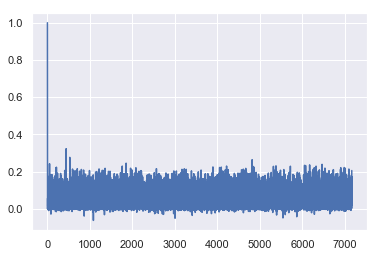

In [295]:
plt.plot(D)

In [332]:
Dist = []

for f1 in filenames:
    print(f1)
    D = []
    P1 = pd.read_csv("Data/Stocks/"+ f1)
    P1["Date"]=P1["Date"].apply(lambda d: datetime.strptime(d,"%Y-%m-%d"))
    N = len(P1)

    for f2 in filenames:
        P2 = pd.read_csv("Data/Stocks/"+ f2)

        P2["Date"]=P2["Date"].apply(lambda d: datetime.strptime(d,"%Y-%m-%d"))

        P2r = P2[P2["Date"].isin(P1["Date"])]
        P1r = P1[P1["Date"].isin(P2["Date"])]

        R1 = (np.array(P1r["High"].iloc[1:]) - np.array(P1r["High"].iloc[:-1]))/np.array(P1r["High"].iloc[:-1])
        R2 = (np.array(P2r["High"].iloc[1:]) - np.array(P2r["High"].iloc[:-1]))/np.array(P2r["High"].iloc[:-1])
        D.append([pd.Series(R1).corr(pd.Series(R2)),(len(R1)/N)])
    
    Dist.append(D)

iba.us.txt


/Users/emmanuelprofumo/Desktop/InvestmentAnalysis/venv/lib/python3.6/site-packages/numpy/lib/function_base.py:2392: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/emmanuelprofumo/Desktop/InvestmentAnalysis/venv/lib/python3.6/site-packages/numpy/lib/function_base.py:2326: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


wpz.us.txt
opnt.us.txt
indf.us.txt


KeyboardInterrupt: 